# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as kera
print(f"Tensor version:{tf.__version__}")
print(f"Keras  version:{kera.__version__}")

Tensor version:2.6.0
Keras  version:2.6.0


## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
drop_fields = ['RowNumber', 'CustomerId', 'Surname']
target_field = 'Exited'

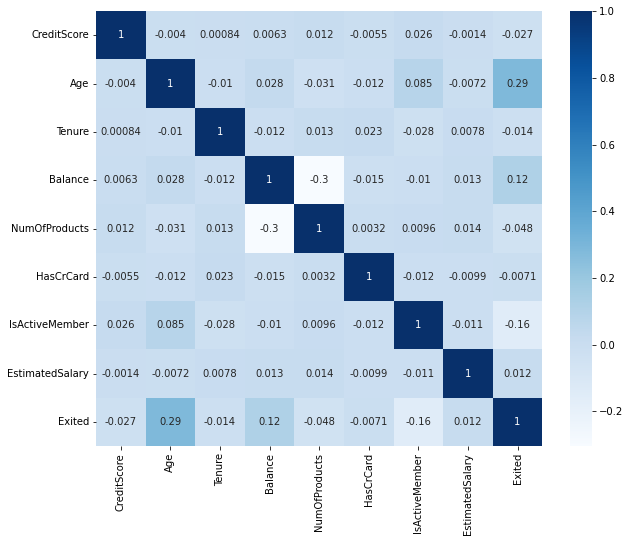

In [4]:
train_eda = dataset.drop(drop_fields,axis=1)
# dataset.head()
# dataset.shape
# dataset.describe()
# dataset.columns
# dataset.info()
# dataset.isnull().sum()

# #Draw a heatmap
# print(X.columns)
plt.figure(figsize=(10,8))
sns.heatmap(data = train_eda.corr(), annot = True, cmap = 'Blues')
# sns.lineplot(data = train_eda)
plt.show()
# #Draw a BoxPlot
# sns.boxplot(x=X["Balance"])


In [5]:
X = dataset.drop(drop_fields,axis=1)
y = dataset[target_field]
X = pd.get_dummies(X)
# print(y)

### Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [16]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#optimizer ==> adam ==> Stochastic Gradient Descent
#loss ==> binary_crossentropy ==> result is binary 

### Training the ANN on the Training set

In [18]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5846 - accuracy: 0.7570
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.2025 - accuracy: 0.9906
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 1.0000
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 9.6577e-04 - accuracy: 1.0000
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 7.0324e-04 - accuracy

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [61]:
# print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [19]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
# y_pred
# len(y_test)

# print("Pred\tActual ==> Same?")
# # y_test.values[0]
# for i in range(0,len(y_test)):
#     equal = (y_pred[i] == y_test.values[i])
#     if (not equal):
#         print(f"{y_pred[i]}\t{y_test.values[i]} ==> {equal}")
# # print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1578    0]
 [   0  422]]


1.0